## Import

In [768]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import MinMaxScaler

## Data Load

In [769]:
# 필요한 데이터를 load 하겠습니다. 경로는 환경에 맞게 지정해주면 됩니다.
train_path = '/data/ephemeral/home/data/train.csv'
test_path  = '/data/ephemeral/home/data/test.csv'
dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)

In [770]:
dt.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target'],
      dtype='object')

In [771]:
dt_test.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일'],
      dtype='object')

In [772]:
# dt.iloc[1118821,:]
# dt_test.iloc[0,:]
# dt = pd.concat([dt,dt_test], axis = 0)
# dt.iloc[1118821,:]
# dt.iloc[1118822,:]

In [773]:
dt.dtypes.value_counts()

object     29
float64    18
int64       5
dtype: int64

In [774]:
dt.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target'],
      dtype='object')

## Drop columns

In [775]:
dt.drop(columns=['아파트명', '번지', '본번', '부번', '계약일', '도로명', '중개사소재지', 'k-전화번호','k-팩스번호',
                 '단지소개기존clob','k-전체동수','k-전체세대수','k-건설사(시공사)',
                 'k-시행사','k-연면적','k-주거전용면적','k-관리비부과면적','k-홈페이지','k-등록일자','k-수정일자','해제사유발생일','k-사용검사일-사용승인일',
                 '고용보험관리번호','건축면적','주차대수','단지승인일','사용허가여부','관리비 업로드','단지신청일','좌표X', '좌표Y'], inplace=True)
dt_test.drop(columns=['아파트명', '번지', '본번', '부번', '계약일', '도로명', '중개사소재지', 'k-전화번호','k-팩스번호',
                 '단지소개기존clob','k-전체동수','k-전체세대수','k-건설사(시공사)',
                 'k-시행사','k-연면적','k-주거전용면적','k-관리비부과면적','k-홈페이지','k-등록일자','k-수정일자','해제사유발생일','k-사용검사일-사용승인일',
                 '고용보험관리번호','건축면적','주차대수','단지승인일','사용허가여부','관리비 업로드','단지신청일','좌표X', '좌표Y'], inplace=True)

In [776]:
dt.columns

Index(['시군구', '전용면적(㎡)', '계약년월', '층', '건축년도', '등기신청일자', '거래유형',
       'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4',
       'target'],
      dtype='object')

In [777]:
# 파생변수 제작으로 추가된 변수들이 존재하기에, 다시한번 연속형과 범주형 칼럼을 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in dt.columns:
    if pd.api.types.is_numeric_dtype(dt[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['전용면적(㎡)', '계약년월', '층', '건축년도', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'target']
범주형 변수: ['시군구', '등기신청일자', '거래유형', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4']


# 결측치 처리


### 결측치가 있는 행 제거


In [778]:
missing_count = dt.isnull().sum(axis=1)
print(max(missing_count))

13


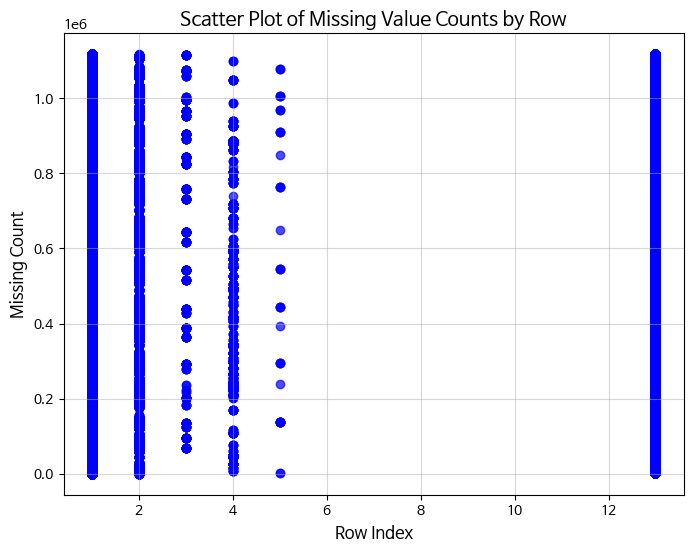

In [779]:
plt.figure(figsize=(8, 6))
plt.scatter(missing_count, range(len(missing_count)), color='blue', alpha=0.7)
plt.title('Scatter Plot of Missing Value Counts by Row', fontsize=14)
plt.xlabel('Row Index', fontsize=12)
plt.ylabel('Missing Count', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [780]:
threshold = 15  # 결측치 개수

# 각 행에 대해 결측치 개수를 계산하고, threshold 이상의 결측치를 가진 행을 삭제
dt = dt[dt.isnull().sum(axis=1) < threshold]
dt.shape

(1118822, 21)

In [781]:
dt.columns

Index(['시군구', '전용면적(㎡)', '계약년월', '층', '건축년도', '등기신청일자', '거래유형',
       'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4',
       'target'],
      dtype='object')

## Train + Test Concat

In [782]:
dt = pd.concat([dt,dt_test], axis = 0).reset_index(drop=True) # test 데이터는 9272개 [-9272:]

In [783]:
dt.shape

(1128094, 21)

# 데이터 변환

### split 시군구


In [784]:
split_df = dt['시군구'].str.split(' ', expand=True)
split_df.columns = ['시', '구', '동'] 
split_df.drop(columns='시', inplace=True)
split_df.sample(20)

,구,동
640043,은평구,진관동
1093630,노원구,월계동
77104,양천구,신월동
45233,동대문구,전농동
385301,은평구,진관동
934576,도봉구,방학동
965743,종로구,충신동
848485,강남구,대치동
1050604,마포구,염리동
989713,서대문구,연희동


In [785]:
dt.drop(columns='시군구', inplace=True)
dt = pd.concat([dt, split_df], axis=1)
dt.columns

Index(['전용면적(㎡)', '계약년월', '층', '건축년도', '등기신청일자', '거래유형', 'k-단지분류(아파트,주상복합등등)',
       'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', 'target', '구', '동'],
      dtype='object')

전용면적(㎡) : MinMax Scaling

계약년월 :연도, 월 분리 /  월 -> 성수기(6~8월 제외), 비수기(6~8월)로 구분

층 : Min max scaling

건축년도 : 2024년을 기준으로 차이값을 계산 후 이를 역수로 치환 (음수로 사용해볼수도 있음)

등기신청일자 : 있으면 1 없으면 0

거래유형 : (중개거래1, 직거래0)

## 계약년월 -> 연, 월 분할 / 월 -> 성수기 여부로 변환

In [786]:
dt['계약년도'] = dt['계약년월'].astype(str).str[:4].astype(int)
dt['계약월'] = dt['계약년월'].astype(str).str[4:6].astype(int)
dt.drop(columns=['계약년월'], inplace=True)
dt['성수기여부'] = dt['계약월'].apply(lambda x: 1 if 6 <= x <= 8 else 0) # 성수기 = 1, 비성수기 = 0
dt.drop(columns='계약월', inplace=True)
dt.columns

# maps = {'비성수기' : 0, '성수기' : 1}
# dt['성수기여부'] = dt['성수기여부'].map(maps)

Index(['전용면적(㎡)', '층', '건축년도', '등기신청일자', '거래유형', 'k-단지분류(아파트,주상복합등등)',
       'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', 'target', '구', '동',
       '계약년도', '성수기여부'],
      dtype='object')

## 전용면적, 층 MinMaxScaler()


In [787]:
scaler = MinMaxScaler()
dt['전용면적'] = scaler.fit_transform(dt[['전용면적(㎡)']])
scaler = MinMaxScaler()
dt['층'] = scaler.fit_transform(dt[['층']])
dt.drop(columns=['전용면적(㎡)'], inplace=True)
dt.columns

Index(['층', '건축년도', '등기신청일자', '거래유형', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', 'target', '구', '동',
       '계약년도', '성수기여부', '전용면적'],
      dtype='object')

In [788]:
dt.sample(5)

,층,건축년도,등기신청일자,거래유형,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전용면적별세대현황(60㎡이하),...,경비비관리형태,세대전기계약방법,청소비관리형태,기타/의무/임대/임의=1/2/3/4,target,구,동,계약년도,성수기여부,전용면적
966823,0.178082,1987,,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,33700.0,중랑구,면목동,2011,0,0.180787
771969,0.082192,1992,,-,아파트,분양,위탁관리,복도식,지역난방,1476.0,...,위탁,단일계약,위탁,의무,18200.0,강서구,가양동,2014,0,0.071398
848294,0.123288,1997,,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34250.0,강남구,논현동,2013,0,0.062056
109689,0.315068,2002,,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,44500.0,노원구,공릉동,2012,0,0.258624
1103079,0.123288,2005,,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12600.0,마포구,서교동,2007,1,0.058581


In [789]:
dt.isnull().sum()

층                               0
건축년도                            0
등기신청일자                          0
거래유형                            0
k-단지분류(아파트,주상복합등등)         877273
k-세대타입(분양형태)               876125
k-관리방식                     876125
k-복도유형                     876454
k-난방방식                     876125
k-전용면적별세대현황(60㎡이하)         876170
k-전용면적별세대현황(60㎡~85㎡이하)     876170
k-85㎡~135㎡이하               876170
k-135㎡초과                  1127765
경비비관리형태                    877561
세대전기계약방법                   885389
청소비관리형태                    877751
기타/의무/임대/임의=1/2/3/4        876125
target                       9272
구                               0
동                               0
계약년도                            0
성수기여부                           0
전용면적                            0
dtype: int64

## 건축년도 : 1 / (2024 - 건축년도)


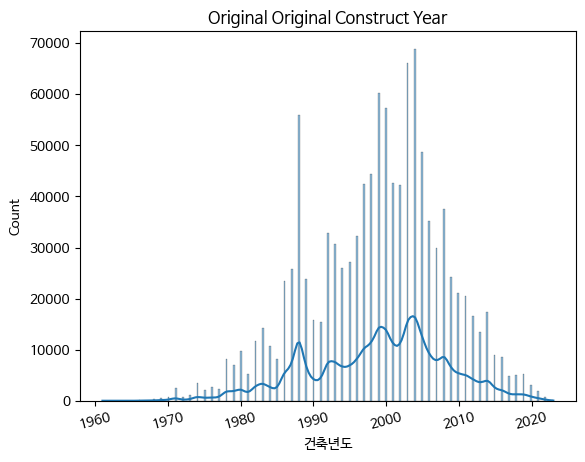

In [790]:
plt.title('Original Original Construct Year')
plt.xticks(rotation=15)
sns.histplot(dt['건축년도'], kde=True)
# plt.ylim(0, 2200)  
plt.show()

In [791]:
# 4. 건축년도 : 2024년 기준 차이값 계산 후 역수
dt['건축년도'] = 2024 - dt['건축년도']
# dt['건축년도'] = (1 / dt['건축년도']).round(2)
dt.columns

Index(['층', '건축년도', '등기신청일자', '거래유형', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', 'target', '구', '동',
       '계약년도', '성수기여부', '전용면적'],
      dtype='object')

In [792]:
# MinMaxScaler는 입력 데이터를 2D 형태([[value], ...] 또는 (n_samples, n_features))로 기대합니다.
# Pandas Series는 1D 배열 형태이므로 .values.reshape(-1, 1)로 변환해야 합니다
dt['건축년도'] = scaler.fit_transform(dt['건축년도'].values.reshape(-1, 1))
dt['건축년도']

0          0.580645
1          0.580645
2          0.580645
3          0.580645
4          0.580645
             ...   
1128089    0.145161
1128090    0.145161
1128091    0.145161
1128092    0.145161
1128093    0.145161
Name: 건축년도, Length: 1128094, dtype: float64

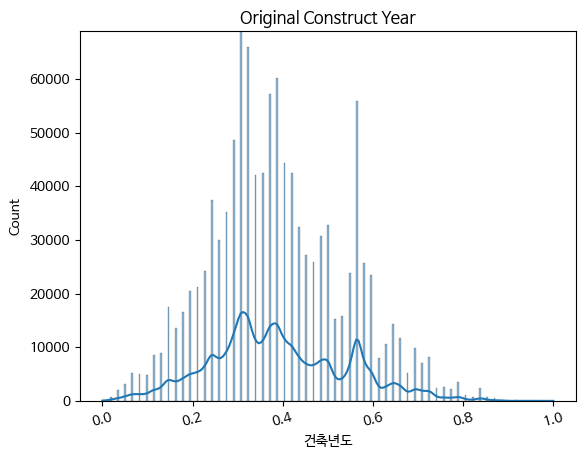

In [793]:
plt.title('Original Construct Year')
plt.xticks(rotation=15)
sns.histplot(dt['건축년도'], kde=True)
plt.ylim(0, dt['건축년도'].value_counts().max())  
plt.show()

## 중간점검


In [794]:
dt[['계약년도', '성수기여부', '전용면적', '층','건축년도']].sample(5)

,계약년도,성수기여부,전용면적,층,건축년도
529841,2017,0,0.175597,0.232877,0.467742
1044863,2008,0,0.120444,0.150685,0.370968
147725,2009,1,0.180763,0.178082,0.500000
282716,2021,1,0.180087,0.136986,0.483871
617993,2016,0,0.180328,0.178082,0.290323


In [795]:
dt[['계약년도', '성수기여부', '전용면적', '층','건축년도']].isnull().sum()

계약년도     0
성수기여부    0
전용면적     0
층        0
건축년도     0
dtype: int64

## 등기신청일자

등기신청일자 : 있으면 1 없으면 0

In [796]:
dt[dt['등기신청일자'] == ' ' ]

,층,건축년도,등기신청일자,거래유형,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전용면적별세대현황(60㎡이하),...,경비비관리형태,세대전기계약방법,청소비관리형태,기타/의무/임대/임의=1/2/3/4,target,구,동,계약년도,성수기여부,전용면적
0,0.095890,0.580645,,-,아파트,분양,자치관리,계단식,개별난방,20.0,...,직영,단일계약,직영,임의,124000.0,강남구,개포동,2017,0,0.168839
1,0.109589,0.580645,,-,아파트,분양,자치관리,계단식,개별난방,20.0,...,직영,단일계약,직영,임의,123500.0,강남구,개포동,2017,0,0.168839
2,0.123288,0.580645,,-,아파트,분양,자치관리,계단식,개별난방,20.0,...,직영,단일계약,직영,임의,91500.0,강남구,개포동,2017,0,0.108520
3,0.109589,0.580645,,-,아파트,분양,자치관리,계단식,개별난방,20.0,...,직영,단일계약,직영,임의,130000.0,강남구,개포동,2018,0,0.168839
4,0.082192,0.580645,,-,아파트,분양,자치관리,계단식,개별난방,20.0,...,직영,단일계약,직영,임의,117000.0,강남구,개포동,2018,0,0.168839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128088,0.178082,0.677419,,중개거래,아파트,분양,자치관리,복도식,개별난방,121.0,...,직영,종합계약,직영,임의,NaN,중구,묵정동,2023,0,0.102438
1128089,0.232877,0.145161,,직거래,아파트,기타,위탁관리,혼합식,개별난방,808.0,...,위탁,종합계약,위탁,의무,NaN,중랑구,신내동,2023,1,0.180135
1128090,0.219178,0.145161,,중개거래,아파트,기타,위탁관리,혼합식,개별난방,808.0,...,위탁,종합계약,위탁,의무,NaN,중랑구,신내동,2023,1,0.180063
1128091,0.219178,0.145161,,중개거래,아파트,기타,위탁관리,혼합식,개별난방,808.0,...,위탁,종합계약,위탁,의무,NaN,중랑구,신내동,2023,1,0.221168


In [797]:
dt['등기신청일자'] = dt['등기신청일자'].apply(lambda x:0.1 if x == ' ' else 1)
dt['등기신청일자'].unique()

array([0.1, 1. ])

## 거래유형 -> OHE

In [798]:
dt['거래유형'].unique()

array(['-', '중개거래', '직거래'], dtype=object)

In [799]:
dt['거래유형'].replace('-', np.nan, inplace=True)

In [800]:
# dt['거래유형'] = dt['거래유형'].apply(lambda x : 0.1 if x == '직거래' else(1 if x == '중개거래' else 0.5))
# OHE
tmp = pd.get_dummies(dt['거래유형'])
tmp.head(5)

,중개거래,직거래
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [801]:
dt = pd.concat([dt, tmp], axis=1)
dt.drop(columns='거래유형', inplace=True)
dt.columns

Index(['층', '건축년도', '등기신청일자', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)',
       'k-85㎡~135㎡이하', 'k-135㎡초과', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '기타/의무/임대/임의=1/2/3/4', 'target', '구', '동', '계약년도', '성수기여부', '전용면적',
       '중개거래', '직거래'],
      dtype='object')

In [802]:
dt.sample(5)

,층,건축년도,등기신청일자,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),...,청소비관리형태,기타/의무/임대/임의=1/2/3/4,target,구,동,계약년도,성수기여부,전용면적,중개거래,직거래
440639,0.479452,0.161290,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,82750.0,중랑구,상봉동,2019,1,0.234371,0,0
528177,0.123288,0.370968,0.1,아파트,분양,위탁관리,혼합식,개별난방,396.0,340.0,...,위탁,의무,54800.0,영등포구,당산동4가,2017,0,0.120034,0,0
457467,0.150685,0.467742,0.1,아파트,분양,자치관리,계단식,지역난방,0.0,0.0,...,직영,의무,55500.0,강서구,방화동,2017,0,0.218030,0,0
574501,0.095890,0.338710,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28700.0,금천구,독산동,2015,0,0.109896,0,0
83998,0.136986,0.629032,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,41800.0,영등포구,신길동,2017,0,0.121796,0,0


##
k-단지분류(아파트,주상복합등등) : 아파트 > 주상복합 ? 연립주택 > 도시형생활 주택(주상복합 > 아파트) 내림차순 번호 할당

k-세대타입(분양형태) : O : 분양, (기타 )> 임대

k-관리방식 : O : 위탁관리 > 자치관리 > 직영

k-복도유형 : O : 계단식 > 혼합식 > 복도식 > 타워형 > 기타

k-난방방식 : O :개별난방 > 지역난방 > 중앙난방 > 기타

k-사용검사일-사용승인일 : - : 사용승인일 - 사용검사일 의 결과값에 대해서 Min Max Scale

## 단지분류

아파트 > 주상복합 ? 연립주택 > 도시형생활 주택(주상복합 > 아파트) 내림차순 번호 할당 -> OHE

In [803]:
dt['k-단지분류(아파트,주상복합등등)'].unique()

array(['아파트', '주상복합', nan, '연립주택', '도시형 생활주택(아파트)', '도시형 생활주택(주상복합)'],
      dtype=object)

In [804]:
dt['k-단지분류(아파트,주상복합등등)'].replace('nan', np.nan, inplace=True)
dt['k-단지분류(아파트,주상복합등등)'].unique()

array(['아파트', '주상복합', nan, '연립주택', '도시형 생활주택(아파트)', '도시형 생활주택(주상복합)'],
      dtype=object)

In [805]:
tmp = pd.get_dummies(dt['k-단지분류(아파트,주상복합등등)'])
tmp.head(5)

,도시형 생활주택(아파트),도시형 생활주택(주상복합),아파트,연립주택,주상복합
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [806]:
dt = pd.concat([dt, tmp], axis=1)
dt.drop(columns='k-단지분류(아파트,주상복합등등)', inplace=True)
dt.columns

Index(['층', '건축년도', '등기신청일자', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4',
       'target', '구', '동', '계약년도', '성수기여부', '전용면적', '중개거래', '직거래',
       '도시형 생활주택(아파트)', '도시형 생활주택(주상복합)', '아파트', '연립주택', '주상복합'],
      dtype='object')

In [807]:
dt.sample(5)

,층,건축년도,등기신청일자,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,...,계약년도,성수기여부,전용면적,중개거래,직거래,도시형 생활주택(아파트),도시형 생활주택(주상복합),아파트,연립주택,주상복합
213007,0.191781,0.145161,0.1,기타,위탁관리,혼합식,지역난방,675.0,588.0,203.0,...,2018,0,0.180594,0,0,0,0,1,0,0
444028,0.178082,0.274194,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2017,1,0.057398,0,0,0,0,0,0,0
174624,0.369863,0.306452,0.1,분양,위탁관리,계단식,개별난방,0.0,0.0,457.0,...,2009,0,0.283104,0,0,0,0,1,0,0
880348,0.232877,0.193548,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2013,1,0.120538,0,0,0,0,0,0,0
757209,0.109589,0.387097,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2015,1,0.114917,0,0,0,0,0,0,0


In [808]:
# maps = {
#     '아파트' : 5,
#     '주상복합' : 4,
#     '연립주택택' : 3,
#     '도시형 생활주택(주상복합)' : 2,
#     '도시형 생활주택(아파트)' : 1, 
# }
# dt['단지분류'] = dt['k-단지분류(아파트,주상복합등등)'].map(maps)
# # dt['단지분류'].apply(lambda x: 0 if x == pd.isna(x) else x)
# dt['단지분류'].fillna(0, inplace = True)
# dt.drop(columns='k-단지분류(아파트,주상복합등등)', inplace = True)
# dt.columns

## 세대타입(분양형태) : 분양, (기타 )> 임대 = 1, 0.5, 0.1 -> OHE


In [809]:
dt['k-세대타입(분양형태)'].unique()

array(['분양', '기타', nan, '임대'], dtype=object)

In [810]:
dt.loc[dt['k-세대타입(분양형태)'] == '기타', 'k-세대타입(분양형태)'] = '분양형태_기타'
dt['k-세대타입(분양형태)'].unique()

array(['분양', '분양형태_기타', nan, '임대'], dtype=object)

In [811]:
dt['k-세대타입(분양형태)'].replace('nan', np.nan, inplace=True)
tmp = pd.get_dummies(dt['k-세대타입(분양형태)'])
tmp.head(5)

,분양,분양형태_기타,임대
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [812]:
dt = pd.concat([dt, tmp], axis=1)
dt.drop(columns='k-세대타입(분양형태)', inplace=True)
dt.columns

Index(['층', '건축년도', '등기신청일자', 'k-관리방식', 'k-복도유형', 'k-난방방식',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4',
       'target', '구', '동', '계약년도', '성수기여부', '전용면적', '중개거래', '직거래',
       '도시형 생활주택(아파트)', '도시형 생활주택(주상복합)', '아파트', '연립주택', '주상복합', '분양',
       '분양형태_기타', '임대'],
      dtype='object')

In [813]:
# maps = {
#     '분양' : 1,
#     '기타' : 0.5,
#     '임대' : 0.1
# }
# dt['세대타입(분양형태)'] = dt['k-세대타입(분양형태)'].map(maps)
# dt.drop(columns='k-세대타입(분양형태)' ,inplace=True)
# dt['세대타입(분양형태)'].fillna(0.1, inplace=True)
# dt['세대타입(분양형태)'].unique()

## 관리방식 : 위탁관리 > 자치관리 > 직영 (1, 0.5, 0.1) -> OHE


In [814]:
dt['k-관리방식'].unique()

array(['자치관리', '위탁관리', '직영', nan], dtype=object)

In [815]:
dt['k-관리방식'].replace('nan', np.nan, inplace=True)
tmp = pd.get_dummies(dt['k-관리방식'])
tmp.head(5)

,위탁관리,자치관리,직영
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [816]:
dt = pd.concat([dt, tmp], axis=1)
dt.drop(columns='k-관리방식', inplace=True)
dt.columns

Index(['층', '건축년도', '등기신청일자', 'k-복도유형', 'k-난방방식', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', 'target', '구', '동',
       '계약년도', '성수기여부', '전용면적', '중개거래', '직거래', '도시형 생활주택(아파트)',
       '도시형 생활주택(주상복합)', '아파트', '연립주택', '주상복합', '분양', '분양형태_기타', '임대', '위탁관리',
       '자치관리', '직영'],
      dtype='object')

In [817]:
# maps = {
#     '위탁관리' : 1,
#     '자치관리' : 0.5,
#     '직영' : 0.1
# }
# dt['관리방식'] = dt['k-관리방식'].map(maps)
# dt.drop(columns='k-관리방식' ,inplace=True)
# dt['관리방식'].fillna(0.1, inplace = True)
# dt['관리방식'].unique()

## 복도유형 : 계단식 > 혼합식 > 복도식 > 타워형 > 기타 (4, 3, 2, 1, 0.1) -> OHE


In [818]:
dt['k-복도유형'].unique()

array(['계단식', '혼합식', '복도식', '타워형', '기타', nan], dtype=object)

In [819]:
dt.loc[dt['k-복도유형'] == '기타', 'k-복도유형'] = '복도유형_기타'
dt['k-복도유형'].unique()

array(['계단식', '혼합식', '복도식', '타워형', '복도유형_기타', nan], dtype=object)

In [820]:
dt['k-복도유형'].replace('nan', np.nan, inplace=True)
tmp = pd.get_dummies(dt['k-복도유형'])
tmp.head(5)

,계단식,복도식,복도유형_기타,타워형,혼합식
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [821]:
dt = pd.concat([dt, tmp], axis=1)
dt.drop(columns='k-복도유형', inplace=True)
dt.columns

Index(['층', '건축년도', '등기신청일자', 'k-난방방식', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', 'target', '구', '동',
       '계약년도', '성수기여부', '전용면적', '중개거래', '직거래', '도시형 생활주택(아파트)',
       '도시형 생활주택(주상복합)', '아파트', '연립주택', '주상복합', '분양', '분양형태_기타', '임대', '위탁관리',
       '자치관리', '직영', '계단식', '복도식', '복도유형_기타', '타워형', '혼합식'],
      dtype='object')

In [822]:
# maps = {
#     '계단식' : 4,
#     '혼합식' : 3,
#     '복도식' : 2,
#     '타워형' : 1,
#     '기타' : 0.1
# }
# dt['복도유형'] = dt['k-복도유형'].map(maps)
# dt.drop(columns= 'k-복도유형',inplace=True)
# dt['복도유형'].fillna(0.1, inplace=True)
# dt['복도유형'].unique()

In [823]:
dt.columns

Index(['층', '건축년도', '등기신청일자', 'k-난방방식', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', 'target', '구', '동',
       '계약년도', '성수기여부', '전용면적', '중개거래', '직거래', '도시형 생활주택(아파트)',
       '도시형 생활주택(주상복합)', '아파트', '연립주택', '주상복합', '분양', '분양형태_기타', '임대', '위탁관리',
       '자치관리', '직영', '계단식', '복도식', '복도유형_기타', '타워형', '혼합식'],
      dtype='object')

## 난방방식 : 개별난방 > 지역난방 > 중앙난방 > 기타 (3, 2, 1, 0.1) -> OHE


In [824]:
dt['k-난방방식'].unique()

array(['개별난방', '지역난방', '기타', nan, '중앙난방'], dtype=object)

In [825]:
dt.loc[dt['k-난방방식'] == '기타', 'k-난방방식'] = '난방방식_기타'
dt['k-난방방식'].unique()

array(['개별난방', '지역난방', '난방방식_기타', nan, '중앙난방'], dtype=object)

In [826]:
dt['k-난방방식'].replace('nan', np.nan, inplace=True)
tmp = pd.get_dummies(dt['k-난방방식'])
tmp.head(5)

,개별난방,난방방식_기타,중앙난방,지역난방
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [827]:
dt = pd.concat([dt, tmp], axis=1)
dt.drop(columns='k-난방방식', inplace=True)
dt.columns

Index(['층', '건축년도', '등기신청일자', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)',
       'k-85㎡~135㎡이하', 'k-135㎡초과', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '기타/의무/임대/임의=1/2/3/4', 'target', '구', '동', '계약년도', '성수기여부', '전용면적',
       '중개거래', '직거래', '도시형 생활주택(아파트)', '도시형 생활주택(주상복합)', '아파트', '연립주택', '주상복합',
       '분양', '분양형태_기타', '임대', '위탁관리', '자치관리', '직영', '계단식', '복도식', '복도유형_기타',
       '타워형', '혼합식', '개별난방', '난방방식_기타', '중앙난방', '지역난방'],
      dtype='object')

In [828]:
# maps = {
#     '개별난방' : 3,
#     '지역난방' : 2,
#     '중앙난방' : 1,
#     '기타' : 0.1
# }
# dt['난방방식'] = dt['k-난방방식'].map(maps)
# dt.drop(columns= 'k-난방방식',inplace=True)
# dt['난방방식'].fillna(0.1, inplace=True)
# dt['난방방식'].unique()

## 면적별~


In [829]:
dt[['k-전용면적별세대현황(60㎡이하)','k-전용면적별세대현황(60㎡~85㎡이하)','k-85㎡~135㎡이하','k-135㎡초과']].isnull().sum()

k-전용면적별세대현황(60㎡이하)         876170
k-전용면적별세대현황(60㎡~85㎡이하)     876170
k-85㎡~135㎡이하               876170
k-135㎡초과                  1127765
dtype: int64

In [830]:
dt['전용면적별세대현황(60㎡이하)'] = dt['k-전용면적별세대현황(60㎡이하)'].fillna(dt['k-전용면적별세대현황(60㎡이하)'].mean())
dt['전용면적별세대현황(60㎡~85㎡이하)'] = dt['k-전용면적별세대현황(60㎡~85㎡이하)'].fillna(dt['k-전용면적별세대현황(60㎡~85㎡이하)'].mean())
dt['85㎡~135㎡이하'] = dt['k-85㎡~135㎡이하'].fillna(dt['k-85㎡~135㎡이하'].mean())
dt['135㎡초과'] = dt['k-135㎡초과'].fillna(dt['k-135㎡초과'].mean())
dt.drop(columns=['k-전용면적별세대현황(60㎡이하)','k-전용면적별세대현황(60㎡~85㎡이하)','k-85㎡~135㎡이하','k-135㎡초과'], inplace = True)
dt[['전용면적별세대현황(60㎡이하)', '전용면적별세대현황(60㎡~85㎡이하)', '85㎡~135㎡이하', '135㎡초과']].isnull().sum()

전용면적별세대현황(60㎡이하)        0
전용면적별세대현황(60㎡~85㎡이하)    0
85㎡~135㎡이하              0
135㎡초과                  0
dtype: int64

In [831]:
categories = ['전용면적별세대현황(60㎡이하)', '전용면적별세대현황(60㎡~85㎡이하)', '85㎡~135㎡이하', '135㎡초과']
for c in categories:
    scaler = MinMaxScaler()
    dt[c] = scaler.fit_transform(dt[[c]])

In [832]:
dt[['전용면적별세대현황(60㎡이하)', '전용면적별세대현황(60㎡~85㎡이하)', '85㎡~135㎡이하', '135㎡초과']].sample(10)

,전용면적별세대현황(60㎡이하),전용면적별세대현황(60㎡~85㎡이하),85㎡~135㎡이하,135㎡초과
158565,0.096197,0.093255,0.111857,0.0
918411,0.096197,0.093255,0.111857,0.0
671686,0.096197,0.093255,0.111857,0.0
902786,0.096197,0.093255,0.111857,0.0
444050,0.096197,0.093255,0.111857,0.0
454721,0.096197,0.093255,0.111857,0.0
454482,0.096197,0.093255,0.111857,0.0
880479,0.096197,0.093255,0.111857,0.0
520878,0.096197,0.093255,0.111857,0.0
161783,0.096197,0.093255,0.111857,0.0


In [833]:
dt.columns

Index(['층', '건축년도', '등기신청일자', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '기타/의무/임대/임의=1/2/3/4', 'target', '구', '동', '계약년도', '성수기여부', '전용면적',
       '중개거래', '직거래', '도시형 생활주택(아파트)', '도시형 생활주택(주상복합)', '아파트', '연립주택', '주상복합',
       '분양', '분양형태_기타', '임대', '위탁관리', '자치관리', '직영', '계단식', '복도식', '복도유형_기타',
       '타워형', '혼합식', '개별난방', '난방방식_기타', '중앙난방', '지역난방', '전용면적별세대현황(60㎡이하)',
       '전용면적별세대현황(60㎡~85㎡이하)', '85㎡~135㎡이하', '135㎡초과'],
      dtype='object')

## 중간점검

경비비관리형태 : 위탁 > 직영 > 위탁+직영 > 기타 : 내림차순 ~ 0

세대전기계약방법 : 종합계약 > 단일계약 : 1, 0

청소비관리형태 : 위탁 > 직영 > 위탁+직영 : 2, 1, 0

기타/의무/임대/임의=1/2/3/4 : 의무 > 기타 > 임의 > 임대


## 경비비관리형태 : 위탁 > 직영 > 위탁+직영 > 기타 -> OHE


In [834]:
dt['경비비관리형태'].unique()

array(['직영', '위탁', '위탁+직영', nan, '기타'], dtype=object)

In [835]:
dt.loc[dt['경비비관리형태'] == '기타', '경비비관리형태'] = '경비비관리형태_기타'
dt['경비비관리형태'].unique()

array(['직영', '위탁', '위탁+직영', nan, '경비비관리형태_기타'], dtype=object)

In [836]:
dt['경비비관리형태'].replace('nan', np.nan, inplace=True)
tmp = pd.get_dummies(dt['경비비관리형태'])
tmp.head(5)

,경비비관리형태_기타,위탁,위탁+직영,직영
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [837]:
dt = pd.concat([dt, tmp], axis=1)
dt.drop(columns='경비비관리형태', inplace=True)
dt.columns

Index(['층', '건축년도', '등기신청일자', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4',
       'target', '구', '동', '계약년도', '성수기여부', '전용면적', '중개거래', '직거래',
       '도시형 생활주택(아파트)', '도시형 생활주택(주상복합)', '아파트', '연립주택', '주상복합', '분양',
       '분양형태_기타', '임대', '위탁관리', '자치관리', '직영', '계단식', '복도식', '복도유형_기타', '타워형',
       '혼합식', '개별난방', '난방방식_기타', '중앙난방', '지역난방', '전용면적별세대현황(60㎡이하)',
       '전용면적별세대현황(60㎡~85㎡이하)', '85㎡~135㎡이하', '135㎡초과', '경비비관리형태_기타', '위탁',
       '위탁+직영', '직영'],
      dtype='object')

In [838]:
# maps = {
#     '위탁' : 3,
#     '직영' : 2,
#     '위탁+직영' : 1,
#     '기타' : 0.1
# }
# dt['경비비관리형태'] = dt['경비비관리형태'].map(maps)
# dt['경비비관리형태'].fillna(0.1, inplace=True)
# dt['경비비관리형태'].unique()

## 세대전기계약방법 : 종합계약 > 단일계약 : 2, 1

In [839]:
dt['세대전기계약방법'].unique()

array(['단일계약', '종합계약', nan], dtype=object)

In [840]:
dt['세대전기계약방법'].replace('nan', np.nan, inplace=True)
tmp = pd.get_dummies(dt['세대전기계약방법'])
tmp.head(5)

,단일계약,종합계약
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [841]:
dt = pd.concat([dt, tmp], axis=1)
dt.drop(columns='세대전기계약방법', inplace=True)
dt.columns

Index(['층', '건축년도', '등기신청일자', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', 'target', '구',
       '동', '계약년도', '성수기여부', '전용면적', '중개거래', '직거래', '도시형 생활주택(아파트)',
       '도시형 생활주택(주상복합)', '아파트', '연립주택', '주상복합', '분양', '분양형태_기타', '임대', '위탁관리',
       '자치관리', '직영', '계단식', '복도식', '복도유형_기타', '타워형', '혼합식', '개별난방', '난방방식_기타',
       '중앙난방', '지역난방', '전용면적별세대현황(60㎡이하)', '전용면적별세대현황(60㎡~85㎡이하)',
       '85㎡~135㎡이하', '135㎡초과', '경비비관리형태_기타', '위탁', '위탁+직영', '직영', '단일계약',
       '종합계약'],
      dtype='object')

In [842]:
# maps = {
#     '종합계약' : 2,
#     '단일계약' : 1,
# }
# dt['세대전기계약방법'] = dt['세대전기계약방법'].map(maps)
# dt['세대전기계약방법'].fillna(0.5, inplace=True)
# dt['세대전기계약방법'].unique()

## 청소비관리형태 : 위탁 > 직영 > 위탁+직영 : 2, 1, 0 -> OHE

In [843]:
dt['청소비관리형태'].unique()

array(['직영', '위탁', '위탁+직영', nan, '기타'], dtype=object)

In [844]:
dt.loc[dt['청소비관리형태'] == '기타', '청소비관리형태'] = '청소비관리형태_기타'
dt['청소비관리형태'].unique()

array(['직영', '위탁', '위탁+직영', nan, '청소비관리형태_기타'], dtype=object)

In [845]:
dt['청소비관리형태'].replace('nan', np.nan, inplace=True)
tmp = pd.get_dummies(dt['청소비관리형태'])
tmp.head(5)

,위탁,위탁+직영,직영,청소비관리형태_기타
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [846]:
dt = pd.concat([dt, tmp], axis=1)
dt.drop(columns='청소비관리형태', inplace=True)
dt.columns

Index(['층', '건축년도', '등기신청일자', '기타/의무/임대/임의=1/2/3/4', 'target', '구', '동',
       '계약년도', '성수기여부', '전용면적', '중개거래', '직거래', '도시형 생활주택(아파트)',
       '도시형 생활주택(주상복합)', '아파트', '연립주택', '주상복합', '분양', '분양형태_기타', '임대', '위탁관리',
       '자치관리', '직영', '계단식', '복도식', '복도유형_기타', '타워형', '혼합식', '개별난방', '난방방식_기타',
       '중앙난방', '지역난방', '전용면적별세대현황(60㎡이하)', '전용면적별세대현황(60㎡~85㎡이하)',
       '85㎡~135㎡이하', '135㎡초과', '경비비관리형태_기타', '위탁', '위탁+직영', '직영', '단일계약',
       '종합계약', '위탁', '위탁+직영', '직영', '청소비관리형태_기타'],
      dtype='object')

In [847]:
# maps = {
#     '위탁' : 3,
#     '직영' : 2,
#     '위탁+직영' : 1,
#     '기타' : 0.1,
# }
# dt['청소비관리형태'] = dt['청소비관리형태'].map(maps)
# dt['청소비관리형태'].fillna(0.1, inplace=True)
# dt['청소비관리형태'].unique()

## 기타/의무/임대/임의 -> OHE

In [848]:
dt['기타/의무/임대/임의=1/2/3/4'].value_counts()

의무    241849
기타      4186
임의      3701
임대      2233
Name: 기타/의무/임대/임의=1/2/3/4, dtype: int64

In [849]:
def plot():
    categories = dt['기타/의무/임대/임의=1/2/3/4'].unique()

    plt.figure(figsize=(12, 8))
    for category in categories:
        subset = dt[dt['기타/의무/임대/임의=1/2/3/4'] == category]
        plt.hist(subset['target'], bins=20, alpha=0.6, label=category)

    plt.title('Histogram of Target by Category', fontsize=16)
    plt.xlabel('Target', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Category')
    plt.show()

In [850]:
dt['기타/의무/임대/임의=1/2/3/4'].replace('nan', np.nan, inplace=True)
tmp = pd.get_dummies(dt['기타/의무/임대/임의=1/2/3/4'])
tmp.head(5)

,기타,의무,임대,임의
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [851]:
dt = pd.concat([dt, tmp], axis=1)
dt.drop(columns='기타/의무/임대/임의=1/2/3/4', inplace=True)
dt.columns

Index(['층', '건축년도', '등기신청일자', 'target', '구', '동', '계약년도', '성수기여부', '전용면적',
       '중개거래', '직거래', '도시형 생활주택(아파트)', '도시형 생활주택(주상복합)', '아파트', '연립주택', '주상복합',
       '분양', '분양형태_기타', '임대', '위탁관리', '자치관리', '직영', '계단식', '복도식', '복도유형_기타',
       '타워형', '혼합식', '개별난방', '난방방식_기타', '중앙난방', '지역난방', '전용면적별세대현황(60㎡이하)',
       '전용면적별세대현황(60㎡~85㎡이하)', '85㎡~135㎡이하', '135㎡초과', '경비비관리형태_기타', '위탁',
       '위탁+직영', '직영', '단일계약', '종합계약', '위탁', '위탁+직영', '직영', '청소비관리형태_기타', '기타',
       '의무', '임대', '임의'],
      dtype='object')

In [852]:
# maps = {
#     '의무' : 3,
#     '임의' : 1,
#     '임대대' : 0.5,
#     '기타' : 0.1,
# }
# dt['기타/의무/임대/임의=1/2/3/4'] = dt['기타/의무/임대/임의=1/2/3/4'].map(maps)
# dt['기타/의무/임대/임의=1/2/3/4'].fillna(0.1, inplace=True)
# dt['기타/의무/임대/임의=1/2/3/4'].unique()

In [853]:
dt.columns

Index(['층', '건축년도', '등기신청일자', 'target', '구', '동', '계약년도', '성수기여부', '전용면적',
       '중개거래', '직거래', '도시형 생활주택(아파트)', '도시형 생활주택(주상복합)', '아파트', '연립주택', '주상복합',
       '분양', '분양형태_기타', '임대', '위탁관리', '자치관리', '직영', '계단식', '복도식', '복도유형_기타',
       '타워형', '혼합식', '개별난방', '난방방식_기타', '중앙난방', '지역난방', '전용면적별세대현황(60㎡이하)',
       '전용면적별세대현황(60㎡~85㎡이하)', '85㎡~135㎡이하', '135㎡초과', '경비비관리형태_기타', '위탁',
       '위탁+직영', '직영', '단일계약', '종합계약', '위탁', '위탁+직영', '직영', '청소비관리형태_기타', '기타',
       '의무', '임대', '임의'],
      dtype='object')

## 구 컬럼 처리 

1. map 이용
2. 원핫인코딩(보류)

In [854]:
len(dt['구'].unique())

25

### '구' -> 학군 생성

In [855]:
school_area = {
    '동대문구' : '동부', '중랑구' : '동부',
    '마포구' : '서부','서대문구' : '서부','은평구' : '서부',
    '영등포구' : '남부', '구로구' : '남부', '금천구' : '남부',
    '노원구' : '북부', '도봉구' : '북부',
    '종로구' : '중부', '중구' : '중부', '용산구' : '중부', 
    '강동구' : '강동송파', '송파구' : '강동송파', 
    '강서구' : '강서양천', '양천구' : '강서양천', 
    '강남구' : '강남서초', '서초구' : '강남서초',
    '동작구' : '동작관악', '관악구' : '동작관악',
    '성동구' : '성동광진', '광진구' : '성동광진',
    '강북구' : '성북강북', '성북구' : '성북광북'
}

In [856]:
dt['학군'] = dt['구'].map(school_area).copy()
#split_dt[split_dt['학군'].isnull() == True]
dum = pd.get_dummies(dt['학군'],prefix='학군')
dt = pd.concat([dt, dum], axis=1)
dt.drop(columns='학군', inplace=True)
dt.sample(5)

,층,건축년도,등기신청일자,target,구,동,계약년도,성수기여부,전용면적,중개거래,...,학군_강서양천,학군_남부,학군_동부,학군_동작관악,학군_북부,학군_서부,학군_성동광진,학군_성북강북,학군_성북광북,학군_중부
449797,0.109589,0.693548,0.1,90000.0,강동구,둔촌동,2017,0,0.168984,0,...,0,0,0,0,0,0,0,0,0,0
890088,0.164384,0.403226,0.1,23000.0,성북구,돈암동,2013,1,0.119623,0,...,0,0,0,0,0,0,0,0,1,0
237002,0.095890,0.322581,0.1,37000.0,은평구,신사동,2021,0,0.154936,1,...,0,0,0,0,0,1,0,0,0,0
883912,0.246575,0.370968,0.1,51500.0,서대문구,홍제동,2013,0,0.252715,0,...,0,0,0,0,0,1,0,0,0,0
642817,0.095890,0.322581,0.1,46000.0,중랑구,면목동,2016,1,0.223543,0,...,0,0,1,0,0,0,0,0,0,0


### '구' 원핫 인코딩

In [857]:
# 원핫인코딩
dt = pd.get_dummies(dt, columns=['구'])
dt.columns

Index(['층', '건축년도', '등기신청일자', 'target', '동', '계약년도', '성수기여부', '전용면적', '중개거래',
       '직거래', '도시형 생활주택(아파트)', '도시형 생활주택(주상복합)', '아파트', '연립주택', '주상복합', '분양',
       '분양형태_기타', '임대', '위탁관리', '자치관리', '직영', '계단식', '복도식', '복도유형_기타', '타워형',
       '혼합식', '개별난방', '난방방식_기타', '중앙난방', '지역난방', '전용면적별세대현황(60㎡이하)',
       '전용면적별세대현황(60㎡~85㎡이하)', '85㎡~135㎡이하', '135㎡초과', '경비비관리형태_기타', '위탁',
       '위탁+직영', '직영', '단일계약', '종합계약', '위탁', '위탁+직영', '직영', '청소비관리형태_기타', '기타',
       '의무', '임대', '임의', '학군_강남서초', '학군_강동송파', '학군_강서양천', '학군_남부', '학군_동부',
       '학군_동작관악', '학군_북부', '학군_서부', '학군_성동광진', '학군_성북강북', '학군_성북광북', '학군_중부',
       '구_강남구', '구_강동구', '구_강북구', '구_강서구', '구_관악구', '구_광진구', '구_구로구', '구_금천구',
       '구_노원구', '구_도봉구', '구_동대문구', '구_동작구', '구_마포구', '구_서대문구', '구_서초구',
       '구_성동구', '구_성북구', '구_송파구', '구_양천구', '구_영등포구', '구_용산구', '구_은평구', '구_종로구',
       '구_중구', '구_중랑구'],
      dtype='object')

In [858]:
# # mapping
# idx = dt.groupby('구')['target'].mean().sort_values(ascending=True).index
# maps = { idx[i-1] : i for i in range(1, len(idx) + 1) }
# dt['구'] = dt['구'].map(maps)

In [859]:
dt.head()

,층,건축년도,등기신청일자,target,동,계약년도,성수기여부,전용면적,중개거래,직거래,...,구_성동구,구_성북구,구_송파구,구_양천구,구_영등포구,구_용산구,구_은평구,구_종로구,구_중구,구_중랑구
0,0.095890,0.580645,0.1,124000.0,개포동,2017,0,0.168839,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.109589,0.580645,0.1,123500.0,개포동,2017,0,0.168839,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.123288,0.580645,0.1,91500.0,개포동,2017,0,0.108520,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.109589,0.580645,0.1,130000.0,개포동,2018,0,0.168839,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.082192,0.580645,0.1,117000.0,개포동,2018,0,0.168839,0,0,...,0,0,0,0,0,0,0,0,0,0


In [860]:
!pwd

/data/ephemeral/home/code


## 동 컬럼 처리 (일단은 drop)

In [861]:
len(dt['동'].unique())

337

In [862]:
dt.drop(columns='동', inplace = True)
dt.columns

Index(['층', '건축년도', '등기신청일자', 'target', '계약년도', '성수기여부', '전용면적', '중개거래', '직거래',
       '도시형 생활주택(아파트)', '도시형 생활주택(주상복합)', '아파트', '연립주택', '주상복합', '분양',
       '분양형태_기타', '임대', '위탁관리', '자치관리', '직영', '계단식', '복도식', '복도유형_기타', '타워형',
       '혼합식', '개별난방', '난방방식_기타', '중앙난방', '지역난방', '전용면적별세대현황(60㎡이하)',
       '전용면적별세대현황(60㎡~85㎡이하)', '85㎡~135㎡이하', '135㎡초과', '경비비관리형태_기타', '위탁',
       '위탁+직영', '직영', '단일계약', '종합계약', '위탁', '위탁+직영', '직영', '청소비관리형태_기타', '기타',
       '의무', '임대', '임의', '학군_강남서초', '학군_강동송파', '학군_강서양천', '학군_남부', '학군_동부',
       '학군_동작관악', '학군_북부', '학군_서부', '학군_성동광진', '학군_성북강북', '학군_성북광북', '학군_중부',
       '구_강남구', '구_강동구', '구_강북구', '구_강서구', '구_관악구', '구_광진구', '구_구로구', '구_금천구',
       '구_노원구', '구_도봉구', '구_동대문구', '구_동작구', '구_마포구', '구_서대문구', '구_서초구',
       '구_성동구', '구_성북구', '구_송파구', '구_양천구', '구_영등포구', '구_용산구', '구_은평구', '구_종로구',
       '구_중구', '구_중랑구'],
      dtype='object')

In [863]:
# idx = dt.groupby('동')['target'].mean().sort_values(ascending=True).index
# print(idx)
# maps = { idx[i-1] : i for i in range(1, len(idx) + 1) }
# maps
# dt['동'] = dt['동'].map(maps)
# dt['동'].unique()

## Endpoint


In [864]:
dt.sample(5)

,층,건축년도,등기신청일자,target,계약년도,성수기여부,전용면적,중개거래,직거래,도시형 생활주택(아파트),...,구_성동구,구_성북구,구_송파구,구_양천구,구_영등포구,구_용산구,구_은평구,구_종로구,구_중구,구_중랑구
520003,0.068493,0.629032,0.1,81000.0,2017,1,0.180565,0,0,0,...,0,0,1,0,0,0,0,0,0,0
597831,0.273973,0.225806,0.1,85000.0,2015,0,0.252764,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539642,0.109589,0.919355,0.1,28800.0,2017,1,0.045329,0,0,0,...,0,0,0,0,0,0,0,1,0,0
662532,0.232877,0.241935,0.1,36500.0,2014,0,0.180208,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548746,0.109589,0.483871,0.1,35800.0,2015,0,0.058943,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [869]:
dt.isnull().sum()

층            0
건축년도         0
등기신청일자       0
target    9272
계약년도         0
          ... 
구_용산구        0
구_은평구        0
구_종로구        0
구_중구         0
구_중랑구        0
Length: 84, dtype: int64

## Train Test split

In [866]:
dt_train = dt[:-dt_test.shape[0]]  # test 행 개수 이전까지는 train
dt_test = dt[-dt_test.shape[0]:]  # 마지막 test 행 개수만큼은 test
dt_test.drop(columns='target', inplace=True)
print(dt_train.shape[0],dt_train.shape[1],dt_test.shape[0],dt_test.shape[1])

1118822 84 9272 83


In [870]:
dt_train.head(5)

,층,건축년도,등기신청일자,target,계약년도,성수기여부,전용면적,중개거래,직거래,도시형 생활주택(아파트),...,구_성동구,구_성북구,구_송파구,구_양천구,구_영등포구,구_용산구,구_은평구,구_종로구,구_중구,구_중랑구
0,0.095890,0.580645,0.1,124000.0,2017,0,0.168839,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.109589,0.580645,0.1,123500.0,2017,0,0.168839,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.123288,0.580645,0.1,91500.0,2017,0,0.108520,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.109589,0.580645,0.1,130000.0,2018,0,0.168839,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.082192,0.580645,0.1,117000.0,2018,0,0.168839,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [871]:
dt_test.head(5)

,층,건축년도,등기신청일자,계약년도,성수기여부,전용면적,중개거래,직거래,도시형 생활주택(아파트),도시형 생활주택(주상복합),...,구_성동구,구_성북구,구_송파구,구_양천구,구_영등포구,구_용산구,구_은평구,구_종로구,구_중구,구_중랑구
1118822,0.123288,0.580645,0.1,2023,1,0.168839,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1118823,0.191781,0.032258,0.1,2023,1,0.236982,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1118824,0.260274,0.629032,0.1,2023,1,0.364422,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1118825,0.246575,0.629032,0.1,2023,1,0.297948,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1118826,0.136986,0.629032,0.1,2023,1,0.227878,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 파일저장

In [872]:
dt_train.to_csv('./train_ohe.csv', index=False)
dt_test.to_csv('./test_ohe.csv', index=False)

# EDA

In [ ]:
rows = dt.shape[0]
over70 = []
over80 = []
for col in dt.columns:
    nand = (dt[col].isnull().sum() / rows) * 100
    if nand >= 70:
        over70.append(col)
        print(f'{col}의 결측치 비율 {nand}%')
    if nand >= 80:
        over80.append(col)

해제사유발생일의 결측치 비율 99.46524111967766%
k-단지분류(아파트,주상복합등등)의 결측치 비율 77.8221200512682%
k-전화번호의 결측치 비율 77.78484870694355%
k-팩스번호의 결측치 비율 78.00543786232305%
단지소개기존clob의 결측치 비율 93.87015986457185%
k-세대타입(분양형태)의 결측치 비율 77.72129972417417%
k-관리방식의 결측치 비율 77.72129972417417%
k-복도유형의 결측치 비율 77.75052689346474%
k-난방방식의 결측치 비율 77.72129972417417%
k-전체동수의 결측치 비율 77.81666788818954%
k-전체세대수의 결측치 비율 77.72129972417417%
k-건설사(시공사)의 결측치 비율 77.85492240946282%
k-시행사의 결측치 비율 77.87244083509263%
k-사용검사일-사용승인일의 결측치 비율 77.73318722728013%
k-연면적의 결측치 비율 77.72129972417417%
k-주거전용면적의 결측치 비율 77.72532181169123%
k-관리비부과면적의 결측치 비율 77.72129972417417%
k-전용면적별세대현황(60㎡이하)의 결측치 비율 77.72532181169123%
k-전용면적별세대현황(60㎡~85㎡이하)의 결측치 비율 77.72532181169123%
k-85㎡~135㎡이하의 결측치 비율 77.72532181169123%
k-135㎡초과의 결측치 비율 99.97077283070944%
k-홈페이지의 결측치 비율 89.88444989462131%
k-등록일자의 결측치 비율 99.01771684861399%
k-수정일자의 결측치 비율 77.72532181169123%
고용보험관리번호의 결측치 비율 81.63085817046858%
경비비관리형태의 결측치 비율 77.84866582888074%
세대전기계약방법의 결측치 비율 78.54216309654262%
청소비관

In [10]:
print(len(over70), len(over80))

37 6


In [14]:
dt.iloc[1]

시군구                               서울특별시 강남구 개포동
번지                                        658-1
본번                                        658.0
부번                                          1.0
아파트명                                     개포6차우성
전용면적(㎡)                                   79.97
계약년월                                     201712
계약일                                          22
층                                             4
건축년도                                       1987
도로명                                       언주로 3
해제사유발생일                                     NaN
등기신청일자                                         
거래유형                                          -
중개사소재지                                        -
k-단지분류(아파트,주상복합등등)                          아파트
k-전화번호                                025776611
k-팩스번호                                025776673
단지소개기존clob                                  NaN
k-세대타입(분양형태)                                 분양
k-관리방식                                  

In [24]:
missing_values = dt.isnull().sum(axis=1)
max_missing_row_index = missing_values.idxmax()
print(missing_values.max(), max_missing_row_index)

40 60194


In [19]:
dt.iloc[60194,].isnull().sum()

40

In [26]:
missing_values.value_counts()

37    862769
4     108088
5      99730
3      23652
6      13478
36      4619
38      2100
7       1796
9       1083
12       650
8        478
2        136
40        75
14        62
11        61
15        45
dtype: int64

## 컬럼 제거


In [54]:
# 제거할 열 리스트
columns_to_remove = ['아파트명', '도로명', '중개사소재지', '번지', '본번', '부번',
                     'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-전체동수',
                     'k-연면적', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', 
                     '사용허가여부']

# 특정 열들을 한번에 제거*
dt_droped = dt.drop(columns=columns_to_remove)
dt_droped.columns

Index(['시군구', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도', '해제사유발생일', '등기신청일자',
       '거래유형', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-주거전용면적',
       'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)',
       'k-85㎡~135㎡이하', 'k-135㎡초과', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적',
       '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target'],
      dtype='object')

In [55]:
dt_droped.shape

(1118822, 36)

In [56]:
missing_values = dt_droped.isnull().sum(axis=1)
max_missing_row_index = missing_values.idxmax()
print(missing_values.max(), max_missing_row_index)

27 975


In [57]:
missing_values.value_counts().sort_index(ascending=False)

27    864918
26      4645
11        62
10        45
6        787
5        799
4       1350
3       8916
2     236035
1       1265
dtype: int64

## 결측치 비율에 따른 행 제거


In [58]:
threshold = 27  # 결측치 개수

# 각 행에 대해 결측치 개수를 계산하고, threshold 이상의 결측치를 가진 행을 삭제
dt_cleaned = dt_droped[dt_droped.isnull().sum(axis=1) < threshold]

In [59]:
dt_cleaned.shape

(253904, 36)

In [60]:
dt_cleaned.isnull().sum()

시군구                            0
전용면적(㎡)                        0
계약년월                           0
계약일                            0
층                              0
건축년도                           0
해제사유발생일                   247921
등기신청일자                         0
거래유형                           0
k-단지분류(아파트,주상복합등등)          5773
k-세대타입(분양형태)                4645
k-관리방식                      4645
k-복도유형                      4972
k-난방방식                      4645
k-전체세대수                     4645
k-건설사(시공사)                  6140
k-시행사                       6336
k-사용검사일-사용승인일               4778
k-주거전용면적                    4690
k-관리비부과면적                   4645
k-전용면적별세대현황(60㎡이하)          4690
k-전용면적별세대현황(60㎡~85㎡이하)      4690
k-85㎡~135㎡이하                4690
k-135㎡초과                  253577
경비비관리형태                     6070
세대전기계약방법                   13829
청소비관리형태                     6260
건축면적                        4796
주차대수                        4796
기타/의무/임대/임의=1/2/3/4         4645
단지승인일     

In [61]:
# 파생변수 제작으로 추가된 변수들이 존재하기에, 다시한번 연속형과 범주형 칼럼을 분리해주겠습니다.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_cleaned.columns:
    if pd.api.types.is_numeric_dtype(dt_cleaned[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("연속형 변수:", continuous_columns_v2)
print("범주형 변수:", categorical_columns_v2)

연속형 변수: ['전용면적(㎡)', '계약년월', '계약일', '층', '건축년도', '해제사유발생일', 'k-전체세대수', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '건축면적', '주차대수', '좌표X', '좌표Y', 'target']
범주형 변수: ['시군구', '등기신청일자', '거래유형', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '관리비 업로드', '단지신청일']


---

구분선

---


In [37]:
dt_cleaned[['k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하','k-135㎡초과' ]].sample(10)

,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과
571126,264.0,327.0,0.0,NaN
93311,0.0,106.0,142.0,NaN
1102543,206.0,152.0,119.0,NaN
954333,0.0,327.0,476.0,NaN
1008928,118.0,104.0,0.0,NaN
854897,184.0,282.0,304.0,NaN
406641,0.0,0.0,564.0,NaN
530206,225.0,142.0,0.0,NaN
623860,0.0,197.0,0.0,NaN
532539,44.0,202.0,246.0,NaN


In [41]:
dt_cleaned.loc[dt_cleaned['k-135㎡초과'].notna() == True]['k-135㎡초과'].head(5)

93602    70.0
93603    70.0
93604    70.0
93605    70.0
93606    70.0
Name: k-135㎡초과, dtype: float64